In [21]:
import matplotlib as mpl
# COLOR = 'white'
# mpl.rcParams['text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['figure.dpi'] = 100


# import fancyimpute as fi
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import variation
from math import isnan

from scipy.cluster.hierarchy import dendrogram,linkage

import sys
sys.path.append("../src/")
import lumberjack
import tree_reader as tr

import sklearn

In [ ]:
## This notebook compares different pre-processing pipelines for working with UMIs.

## We will examine the effects of Log-Transform, PCA, GLM-PCA, 
## centering, pseudo-deconvolution and imputation-esque techniques

## Left slightly generic to accomodate different datasets, as we'd like to compare Citeseq to Nesterowa etc

In [22]:
raw_umis = np.loadtxt('./citeseq_cbmc_umis.tsv')
header = np.loadtxt('./citeseq_cbmc_header.txt',dtype=str)


In [397]:
## Here we will consider different interpretations of what constitutes "counts"

## The most trivial and common interpretation is to MLE infer frequency per million based on values
## Sounds fancy, but it's really just simple scaling. Usually followed by a log transform.

from sklearn.preprocessing import scale



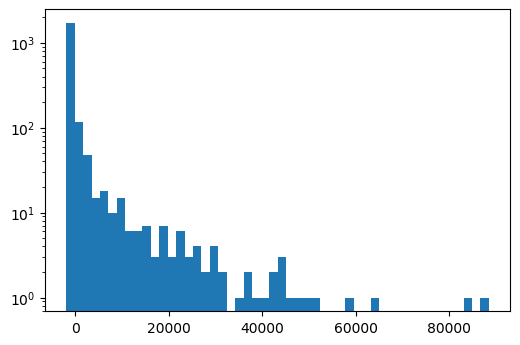

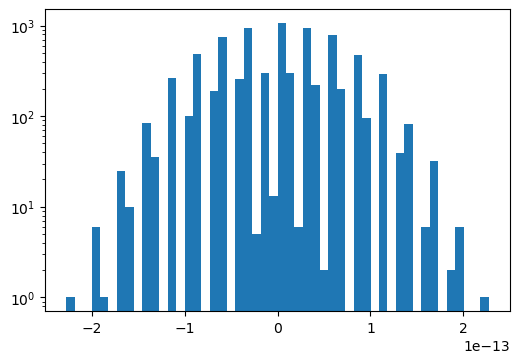

In [30]:
total_umis = np.sum(raw_umis)
total_umis

15514662.0

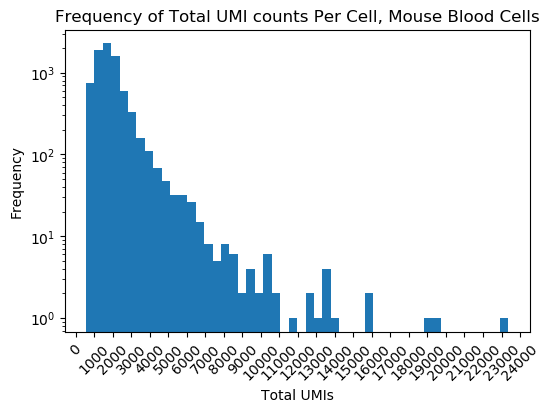

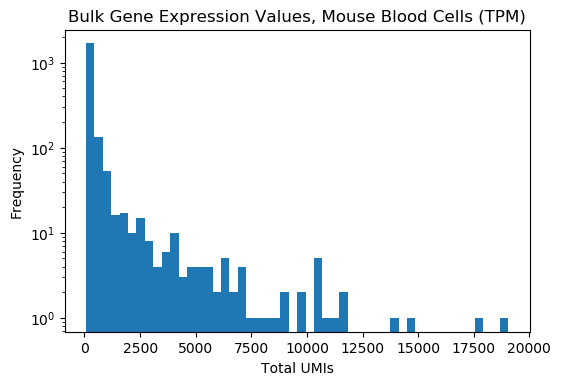

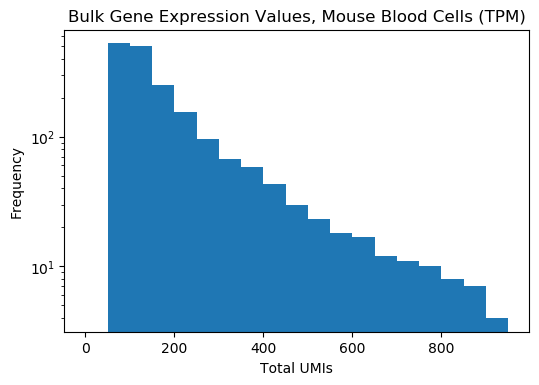

In [363]:
## Let's examine the overall scale of the data first

per_cell_totals = np.sum(raw_umis,axis=1)
per_feature_bulk_expression = (np.sum(raw_umis,axis=0) / total_umis) * 1000000

plt.figure()
plt.title("Frequency of Total UMI counts Per Cell, Mouse Blood Cells")
plt.xlabel(f"Total UMIs")
plt.ylabel("Frequency")
plt.hist(per_cell_totals,bins=50,log=True,)
plt.xticks(np.arange(0,25000,1000),np.arange(0,25000,1000),rotation=45)
plt.show()

plt.figure()
plt.title("Bulk Gene Expression Values, Mouse Blood Cells (TPM)")
plt.xlabel(f"Total UMIs")
plt.ylabel("Frequency")
plt.hist(per_feature_bulk_expression,bins=50,log=True,)
plt.show()

plt.figure()
plt.title("Bulk Gene Expression Values, Mouse Blood Cells (TPM)")
plt.xlabel(f"Total UMIs")
plt.ylabel("Frequency")
plt.hist(per_feature_bulk_expression,bins=np.arange(0,1000,50),log=True,)
plt.show()


# print(np.mean(target,axis=0).shape)
# print(header.shape)

In [408]:
# While we're here, let's produce some scaled results also 

# First we scale by the per-cell counts
# per_cell_totals.shape
cell_scaled_umis = (raw_umis / np.tile(per_cell_totals,(raw_umis.shape[1],1)).T)*1000000



In [ ]:
sorted(per_feature_bulk_expression)[1000]

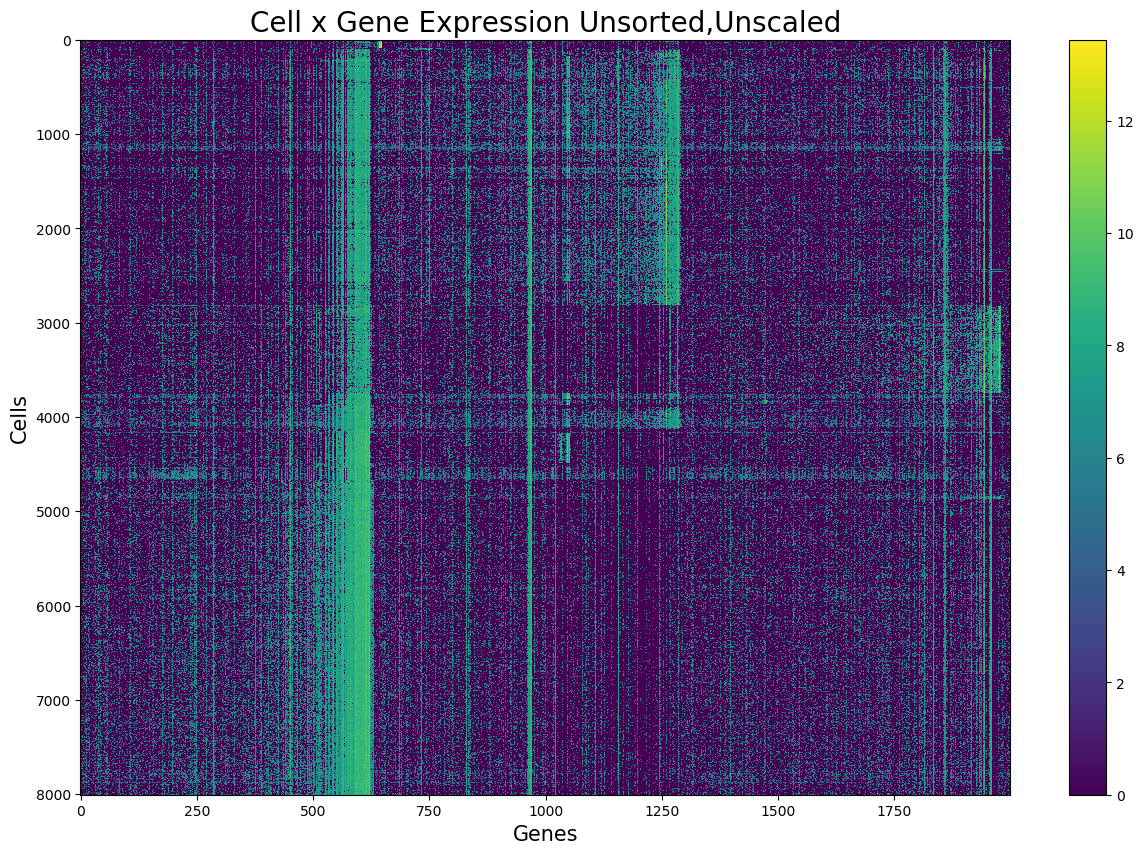

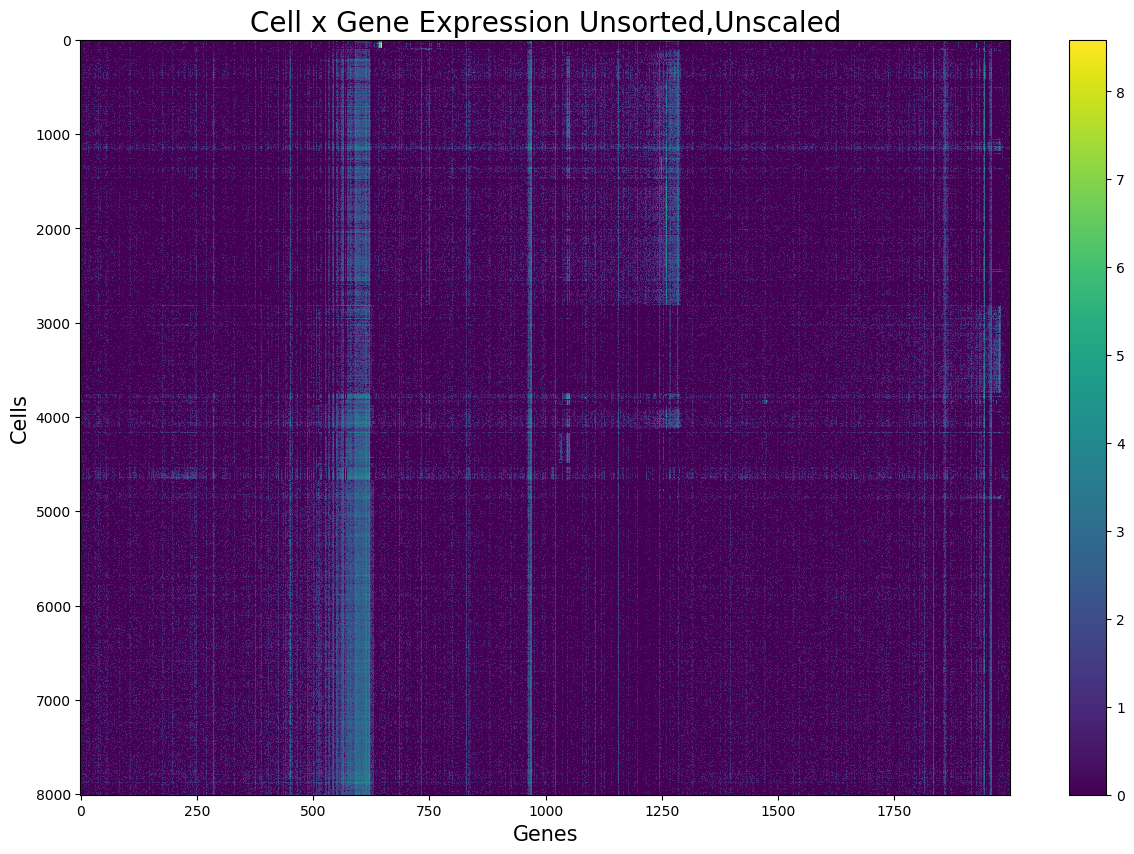

In [412]:


# feature_sort = dendrogram(linkage(raw_umis.T,metric='correlation',method='average'),no_plot=True)['leaves']
cell_sort = dendrogram(linkage(raw_umis,metric='cos',method='average'),no_plot=True)['leaves']


# plt.figure()
# plt.title("Frequency of Individual Values, Mouse Blood Cells")
# plt.xlabel(f"Mean Expression")
# plt.ylabel("Frequency")
# plt.hist(target.flatten(),bins=50,log=True)
# plt.show()


plt.figure(figsize=(15,10))
plt.title("Cell x Gene Expression Unsorted,Unscaled",fontsize=20)
plt.imshow(np.log(1+cell_scaled_umis[cell_sort].T[feature_sort].T),aspect='auto',cmap="viridis")
plt.xlabel("Genes",fontsize=15)
plt.ylabel("Cells",fontsize=15)
plt.colorbar()
plt.show()

plt.figure(figsize=(15,10))
plt.title("Cell x Gene Expression Unsorted,Unscaled",fontsize=20)
plt.imshow(np.log(1+raw_umis[cell_sort].T[feature_sort].T),aspect='auto',cmap="viridis")
plt.xlabel("Genes",fontsize=15)
plt.ylabel("Cells",fontsize=15)
plt.colorbar()
plt.show()

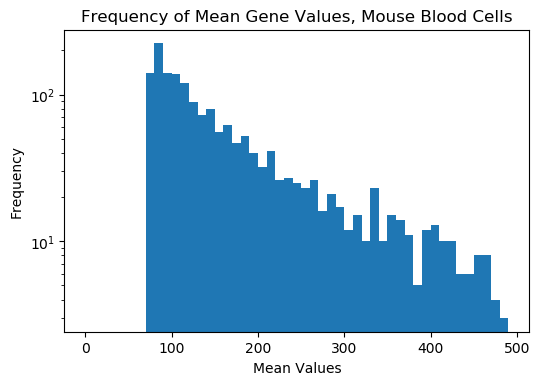

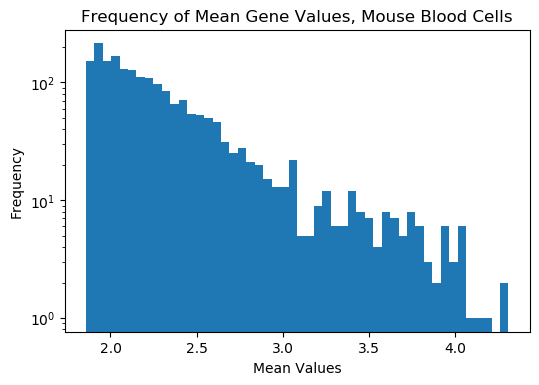

In [423]:

# feature_sort = dendrogram(linkage(cell_scaled_umis.T,metric='correlation',method='average'),no_plot=True)['leaves']
# cell_sort = dendrogram(linkage(cell_scaled_umis,metric='cos',method='average'),no_plot=True)['leaves']

# plt.figure()
# plt.title("Frequency of Individual Values, Mouse Blood Cells")
# plt.xlabel(f"Mean Expression")
# plt.ylabel("Frequency")
# plt.hist(cell_scaled_umis.flatten(),bins=50,log=True)
# plt.show()

# plt.figure()
# plt.title("Frequency of Individual Values, Mouse Blood Cells")
# plt.xlabel(f"Mean Expression")
# plt.ylabel("Frequency")
# plt.hist(np.log10(1+cell_scaled_umis.flatten()),bins=50,log=True)
# plt.show()


plt.figure()
plt.title("Frequency of Mean Gene Values, Mouse Blood Cells")
plt.xlabel(f"Mean Values")
plt.ylabel("Frequency")
plt.hist(np.mean(cell_scaled_umis,axis=0),bins=np.arange(0,500,10),log=True,)
plt.show()


plt.figure()
plt.title("Frequency of Mean Gene Values, Mouse Blood Cells")
plt.xlabel(f"Mean Values")
plt.ylabel("Frequency")
plt.hist(np.log10(np.mean(cell_scaled_umis,axis=0)),bins=50,log=True,)
plt.show()

# plt.figure(figsize=(15,10))
# plt.title("Cell x Gene Expression Unsorted,Unscaled",fontsize=20)
# plt.imshow(np.log(1+cell_scaled_umis[cell_sort].T[feature_sort].T),aspect='auto',cmap="viridis")
# plt.xlabel("Genes",fontsize=15)
# plt.ylabel("Cells",fontsize=15)
# plt.colorbar()
# plt.show()

# plt.figure(figsize=(15,10))
# plt.title("Cell x Gene Expression Unsorted,Unscaled",fontsize=20)
# plt.imshow(np.log(1+raw_umis[cell_sort].T[feature_sort].T),aspect='auto',cmap="viridis")
# plt.xlabel("Genes",fontsize=15)
# plt.ylabel("Cells",fontsize=15)
# plt.colorbar()
# plt.show()





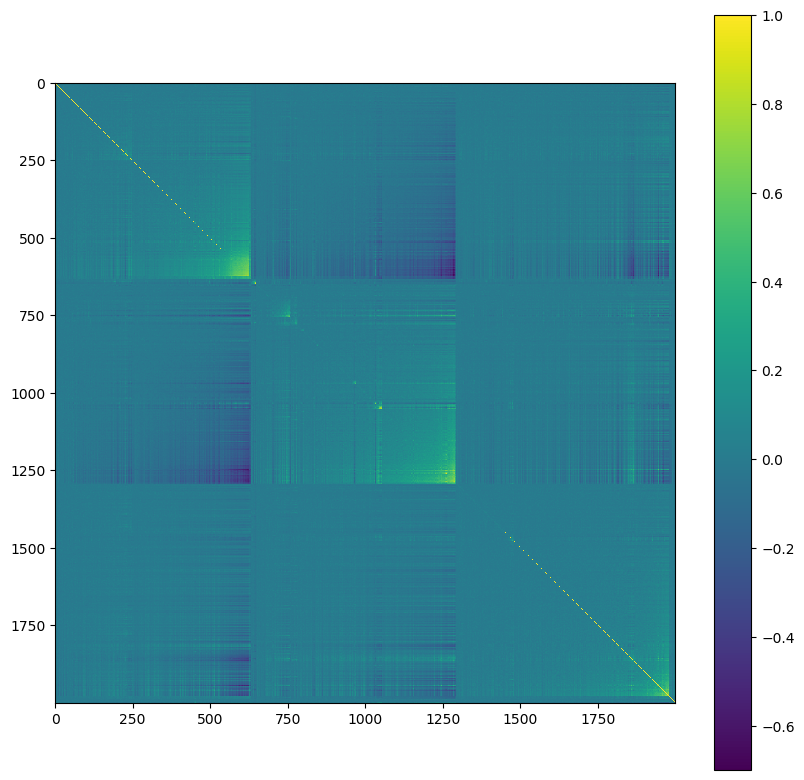

In [530]:
# Now let's look at the overall correlations between features
from scipy.spatial.distance import pdist,squareform

# feature_correlations = squareform(pdist(cell_scaled_umis.T,metric="correlation"))

plt.figure(figsize=(10,10))
plt.imshow(-1*((feature_correlations[feature_sort].T[feature_sort])-1))
plt.colorbar()
plt.show()
# len(feature_sort)

In [ ]:
## To do cluster histograms of features

In [95]:
from scipy.stats import poisson

p_model_150 = poisson(1.5e-4*1500)
p_model_500 = poisson(5e-4*1500)

# p_draws = np.random.poisson(5e-4,10000)
# n_draws = np.random.normal(9,3,100000)



In [ ]:
plt.figure()
plt.hist(p_draws,alpha=.3,log=True)
# plt.hist(n_draws,bins=np.arange(0,25),alpha=.3)
plt.show()

In [ ]:
plt.figure()
plt.title("Probability of Gene Count, 150 vs 500 TPM, 1500 UMIs Per Cell")
plt.plot(np.arange(10),p_model_150.pmf(np.arange(0,10)),label="TPM 150")
plt.plot(np.arange(10),p_model_500.pmf(np.arange(0,10)),label="TPM 500")
plt.legend()
plt.show()

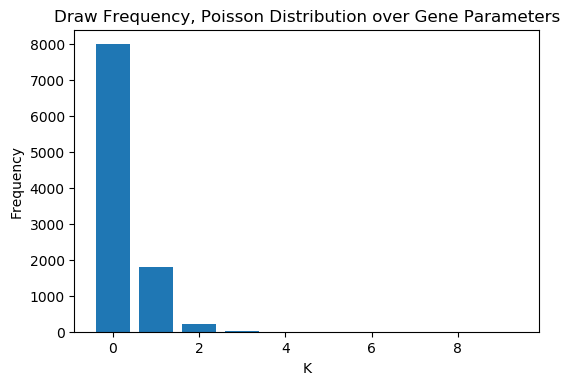

In [87]:
plt.figure()
plt.title("Draw Frequency, Poisson Distribution over Gene Parameters")
plt.bar(np.arange(10),p_model_150.pmf(np.arange(0,10))*10000)
plt.xlabel("K")
plt.ylabel("Frequency")
plt.show()

In [384]:

p_model_special_1 = poisson(8)
p_model_special_2 = poisson(12)
p_model_special_3 = poisson(10)


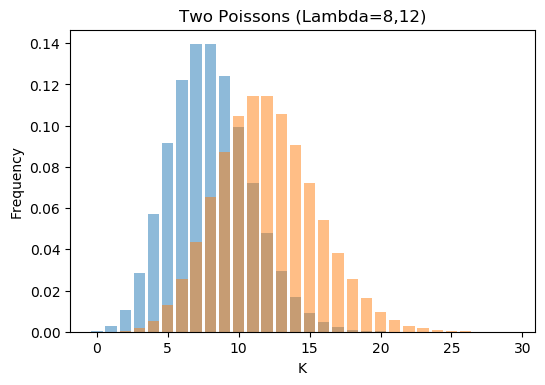

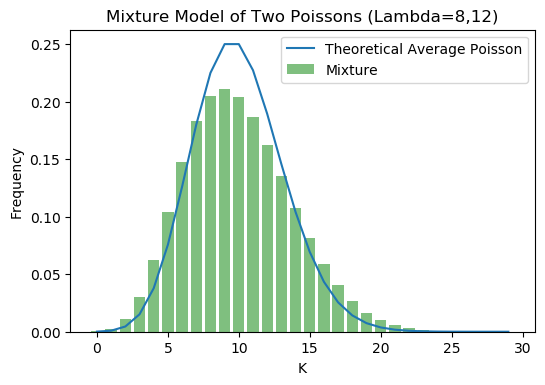

In [385]:
plt.figure()
plt.title("Two Poissons (Lambda=8,12)")
plt.bar(np.arange(30),p_model_special_1.pmf(np.arange(0,30)),alpha = .5)
plt.bar(np.arange(30),p_model_special_2.pmf(np.arange(0,30)),alpha = .5)
plt.xlabel("K")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.title("Mixture Model of Two Poissons (Lambda=8,12)")
plt.bar(np.arange(30),p_model_special_1.pmf(np.arange(0,30))+p_model_special_2.pmf(np.arange(0,30)),color="green",alpha=.5,label="Mixture")
# plt.bar(np.arange(30),p_model_special_3.pmf(np.arange(0,30))*2,alpha = .5)
plt.plot(np.arange(30),p_model_special_3.pmf(np.arange(0,30))*2,label="Theoretical Average Poisson")
plt.legend()
plt.xlabel("K")
plt.ylabel("Frequency")
plt.show()


In [386]:
## bimodal_simulation

a1 = 5
a2 = 5
b1 = 15
b2 = 15
c1 = 10
c2 = 10

draws_a1 = np.random.poisson(a1,10000)
draws_b1 = np.random.poisson(b1,10000)
mixture_a1 = np.ones(10000) * a1
mixture_b1 = np.ones(10000) * b1
draws_c1 = np.random.poisson(c1,20000)

joint_draws_1 = np.concatenate([draws_a1,draws_b1])
joint_mixtures_1 = np.concatenate([mixture_a1,mixture_b1])

decorrelation_1 = np.arange(20000)
# np.random.shuffle(joint_draws_1)
# np.random.shuffle(decorrelation_1[5000:15000])

joint_draws_1 = joint_draws_1[decorrelation_1]
joint_mixtures_1 = joint_mixtures_1[decorrelation_1]

draws_a2 = np.random.poisson(a2,10000)
draws_b2 = np.random.poisson(b2,10000)
mixture_a2 = np.ones(10000) * a2
mixture_b2 = np.ones(10000) * b2
draws_c2 = np.random.poisson(c2,20000)


joint_draws_2 = np.concatenate([draws_a2,draws_b2])
joint_mixtures_2 = np.concatenate([mixture_a2,mixture_b2])

decorrelation_2 = np.arange(20000)
# np.random.shuffle(joint_draws_2)
# np.random.shuffle(decorrelation_2[5000:15000])

joint_draws_2 = joint_draws_2[decorrelation_2]
joint_mixtures_2 = joint_mixtures_2[decorrelation_2]

# joint_grid_shuffled = np.zeros((20,20))
# joint_grid_weakly_correlated = np.zeros((20,20))
joint_grid_fully_correlated = np.zeros((20,20))
# joint_grid_single_distribution = np.zeros((20,20))

for i in range(20):
    for j in range(20):        
        joint_grid_fully_correlated[i,j] = np.sum(np.logical_and(joint_draws_1 == i,joint_draws_2 == j))
        joint_grid[i,j] = np.sum(np.logical_and(draws_b1 == i,draws_b2 == j))
        joint_grid[i,j] = np.sum(np.logical_and(draws_a1 == i,draws_a2 == j))
        joint_grid_single_distribution[i,j] = np.sum(np.logical_and(draws_c1 == i, draws_c2==j))


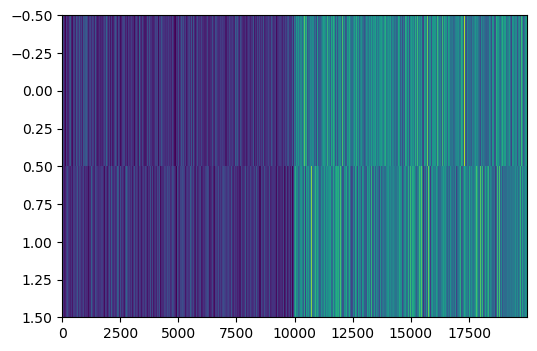

In [387]:
plt.figure()
plt.imshow(np.array([joint_draws_1,joint_draws_2]),aspect='auto')
plt.show()

In [360]:
joint_draws_2

array([1, 0, 0, ..., 2, 1, 3])

In [361]:
print(pearsonr(joint_draws_1,joint_draws_2))
print(pearsonr(joint_mixtures_1,joint_mixtures_2))


(0.21813420577455808, 5.0930576472754644e-214)
(0.5048000000000007, 0.0)


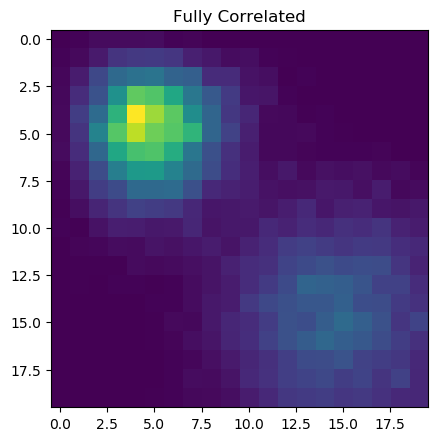

In [388]:
# plt.figure(figsize=(5,5))
# plt.title("Single Distribution")
# plt.imshow(joint_grid_single_distribution)
# plt.show()

# plt.figure(figsize=(5,5))
# plt.title("Shuffled")
# plt.imshow(joint_grid_shuffled)
# plt.show()

# plt.figure(figsize=(5,5))
# plt.title("Weakly Correlated")
# plt.imshow(joint_grid_weakly_correlated)
# plt.show()

plt.figure(figsize=(5,5))
plt.title("Fully Correlated")
plt.imshow(joint_grid_fully_correlated)
plt.show()



In [ ]:
draws_150 = np.random.poisson(1.5e-4*1500,10000)
estimate=(np.log10((draws_150+1) * (1000000/1500)))

In [ ]:
plt.figure()
plt.plot(np.log10(np.arange(10)+1),p_model_150.pmf(np.arange(0,10)),label="TPM 150")
plt.plot(np.log10(np.arange(10)+1),p_model_500.pmf(np.arange(0,10)),label="TPM 500")
plt.show()

In [ ]:
mean_estimates_150 = []
mean_estimates_500 = []
frequency_of_value_150 = p_model_150.pmf(np.arange(0,10)) * 10000
frequency_of_value_500 = p_model_500.pmf(np.arange(0,10)) * 10000
for c in range(1,10):
    value_sum = np.sum(frequency_of_value_150 * np.log10(np.arange(0,10) + c)) ## This is where the log10(x+1) comes in
    log_mean = value_sum/10000
    mean_count = (10**log_mean) - c
    tpm_estimate = mean_count * 666
    mean_estimates_150.append(log_mean)

for c in range(1,10):
    value_sum = np.sum(frequency_of_value_500 * np.log10(np.arange(0,10) + c)) 
    log_mean = value_sum/10000
    mean_count = (10**log_mean) - c
    tpm_estimate = mean_count * 666
    mean_estimates_500.append(log_mean)



plt.figure()
plt.plot(mean_estimates_150)
plt.plot(mean_estimates_500)
plt.show()

In [ ]:

plt.figure()
plt.title("Mean Log Values for given TPM For Different Value of C")
plt.xlabel("TPM")
plt.ylabel("Mean Log Value")
for c in range(1,10):
    mean_estimates_ranged = []
    for tpm in range(1,10000,500):
        p_model = poisson((tpm/1000000)*1500)
        frequency_of_value = p_model.pmf(np.arange(0,100)) * 10000
        value_sum = np.sum(frequency_of_value * np.log10(np.arange(0,100) + c)) 
        log_mean = value_sum/10000
    #     mean_count = (10**log_mean) - 1
    #     tpm_estimate = mean_count * 666
        mean_estimates_ranged.append(log_mean)
    plt.plot(mean_estimates_ranged,label=c)
plt.xticks(np.arange(20),labels=range(0,10000,500),rotation=45)
plt.legend()
plt.show()

In [ ]:
np.sum(frequency_of_value_500)

In [ ]:
(10**np.log10(np.arange(0,10)+1 * 1000)) /1000

In [ ]:
10**2.89

In [23]:
raw_fluorescence = np.loadtxt("citeseq_cbmc_fluorescence_umis.tsv")
fluorescence_header = np.loadtxt("citeseq_cbmc_fluorescence_header.tsv",dtype=str)

In [28]:
fluorescence_header[10]

'CD34'

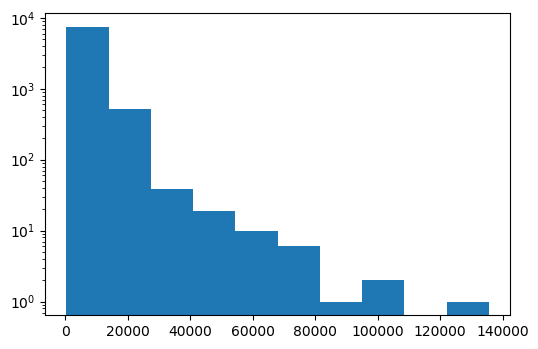

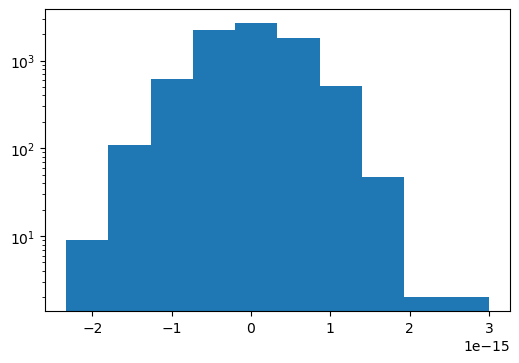

In [26]:
plt.figure()
plt.hist(np.sum(raw_fluorescence,axis=0),log=True)
plt.show()

scaled_fluorescence = scale(raw_fluorescence,axis=0)

plt.figure()
plt.hist(np.sum(scaled_fluorescence,axis=0),log=True)
plt.show()


In [36]:
from sklearn.manifold import TSNE

fluorescence_coordiantes = TSNE().fit_transform(scaled_fluorescence.T)

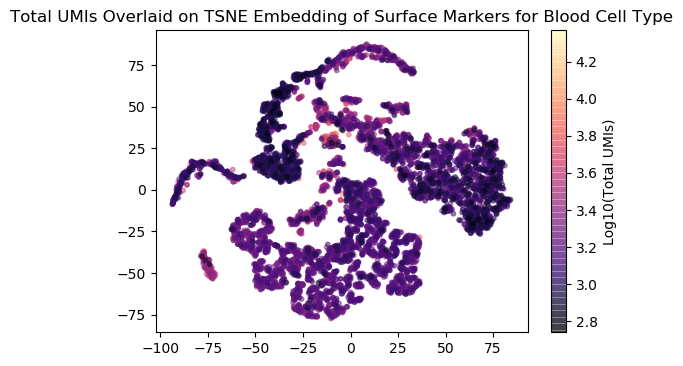

In [37]:
plt.figure()
plt.title("Total UMIs Overlaid on TSNE Embedding of Surface Markers for Blood Cell Type")
plt.scatter(*fluorescence_coordiantes.T,s=10,alpha=.5,c=np.log10(per_cell_totals),cmap="magma")
cb = plt.colorbar()
cb.set_label("Log10(Total UMIs)")
plt.show()

In [41]:
# plt.figure()
# plt.title("CD34 on TSNE Embedding of Blood Cells")
# plt.scatter(*fluorescence_coordiantes.T,s=10,alpha=.5,c=scaled_fluorescence[10],cmap="viridis")
# cb = plt.colorbar()
# plt.show()

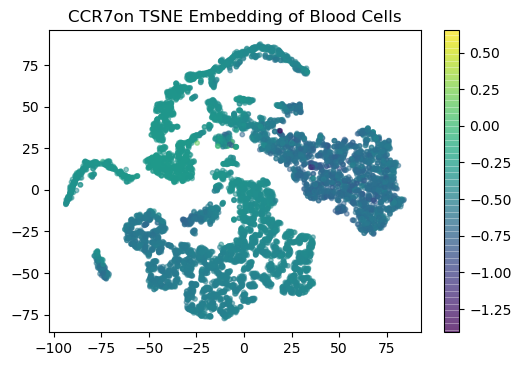

In [61]:
marker = 12

plt.figure()
plt.title(f"{fluorescence_header[marker]}on TSNE Embedding of Blood Cells")
plt.scatter(*fluorescence_coordiantes.T,s=10,alpha=.5,c=scaled_fluorescence[marker],cmap="viridis")
cb = plt.colorbar()
plt.show()

In [62]:
fluorescence_header[12]

'CCR7'

In [ ]:
scaled_fluorescence

In [ ]:
cell_sort = dendrogram(linkage(scaled_fluorescence.T,metric='correlation',method='average'),no_plot=True)['leaves']
feature_sort = dendrogram(linkage(scaled_fluorescence,metric='cos',method='average'),no_plot=True)['leaves']

In [ ]:
sorted_fluorescence = scaled_fluorescence[feature_sort].T[cell_sort]
stacked_fluorescence = np.hstack([sorted_fluorescence,np.log2(per_cell_totals[cell_sort].reshape(-1,1))/3])
stacked_fluorescence.shape

In [ ]:
plt.figure(figsize=(3,6))
plt.title("Cell Surface Markers vs Cell TPM Counts")
plt.imshow(stacked_fluorescence,aspect="auto")
plt.xticks(np.arange(14),fluorescence_header[feature_sort],rotation=90,fontsize=8)
plt.xlim(-.5,13.5)
plt.colorbar()
plt.show()

In [ ]:
len(feature_sort)

In [117]:
raw_umis.shape

(8005, 2000)

In [128]:
shuffled_rows = raw_umis.copy()
np.random.shuffle(shuffled_rows)
shuffled_per_cell = np.sum(shuffled_rows,axis=1)

In [133]:
feature_total_spearman = []

from scipy.stats import spearmanr
for feature in raw_umis.T:
    feature_mean = np.mean(feature)
    rho = spearmanr(feature,per_cell_totals)[0]
    feature_total_spearman.append([feature_mean,rho])


In [134]:
spearman_array = np.array(feature_total_spearman)
spearman_array.shape

(2000, 2)

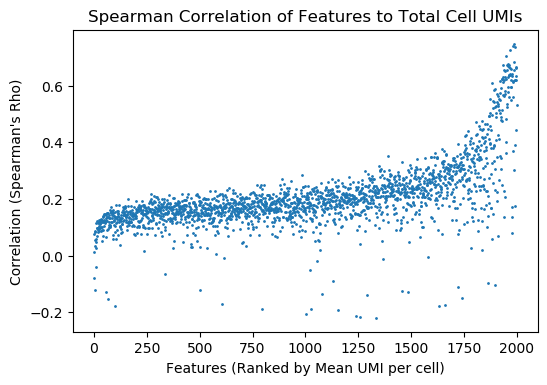

In [135]:
mean_sort = np.argsort(spearman_array.T[0])

plt.figure()
plt.title("Spearman Correlation of Features to Total Cell UMIs")
plt.scatter(np.arange(2000),spearman_array.T[1][mean_sort],s=1)
plt.ylabel("Correlation (Spearman's Rho)")
plt.xlabel("Features (Ranked by Mean UMI per cell)")
plt.show()

# plt.figure()
# plt.title("Spearman Correlation of Features to Total Cell UMIs")
# plt.scatter(np.log10(spearman_array.T[0]),spearman_array.T[1],s=1)
# plt.ylabel("Correlation (Spearman's Rho)")
# plt.xlabel("Mean Feature Expression (Log10 UMI)")
# plt.xlim(-1,1.5)
# plt.ylim(-.2,.8)
# plt.show()

In [112]:
from scipy.stats import pearsonr

feature_total_pearson = []

from scipy.stats import spearmanr
for feature in raw_umis.T:
    feature_mean = np.mean(feature)
    r = pearsonr(feature,per_cell_totals)[0]
    feature_total_pearson.append([feature_mean,r])

pearson_array = np.array(feature_total_pearson)
pearson_array.shape

(2000, 2)

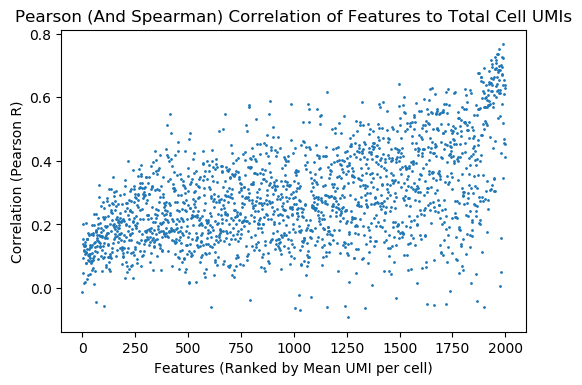

In [116]:
plt.figure()
plt.title("Pearson (And Spearman) Correlation of Features to Total Cell UMIs")
plt.scatter(np.arange(2000),pearson_array.T[1][mean_sort],s=1)
plt.ylabel("Correlation (Pearson R)")
plt.xlabel("Features (Ranked by Mean UMI per cell)")
plt.show()

In [ ]:
# cell_total_sort = np.argsort(per_cell_totals)
# middle_features = raw_umis.T[mean_sort[250:275]]

# for feature in middle_features:
#     plt.figure()
#     plt.scatter(np.log10(per_cell_totals[cell_total_sort]),feature[cell_total_sort],s=2)
#     plt.show()

In [82]:
large_cells = per_cell_totals >= 1262
small_cells = per_cell_totals < 1262

In [79]:
logarithmic_histogram = np.zeros((10,2000))

for i,segment in enumerate(np.arange(0,10)):
    lower = 2**segment
    upper = 2**(segment + 1)
    for j,feature in enumerate(raw_umis.T):
        logarithmic_histogram[i,j] = np.sum(np.logical_and(feature < upper, feature >= lower))



In [80]:
feature_agglomeraton = dendrogram(linkage(np.log2(logarithmic_histogram+1).T,metric='correlation',method='average'),no_plot=True)['leaves']
feature_agglomeraton = np.array(feature_agglomeraton)

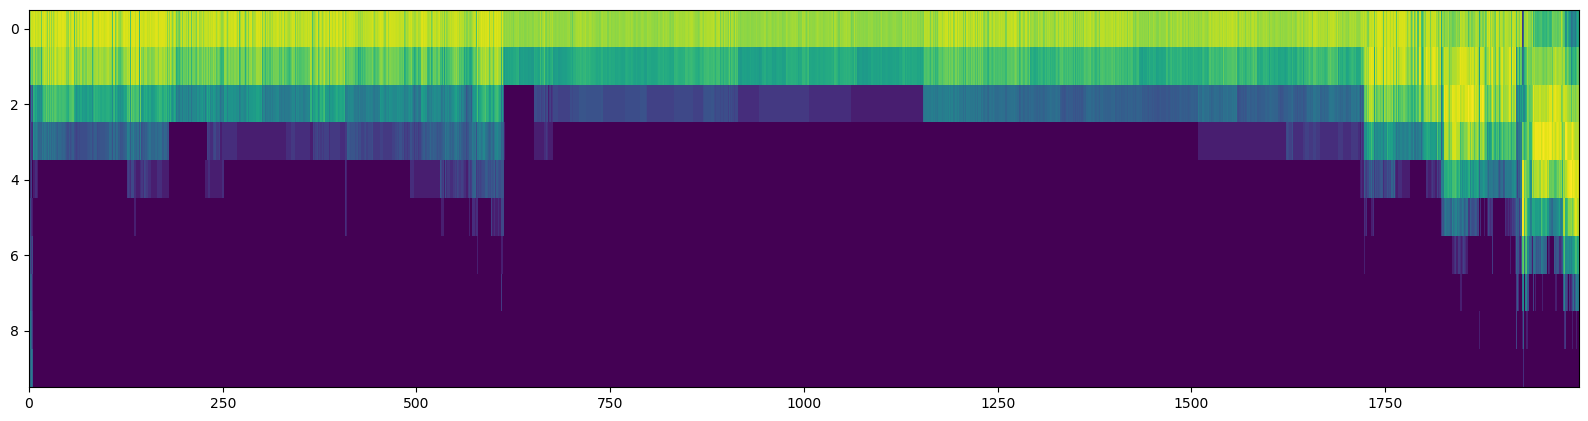

In [99]:
plt.figure(figsize=(20,5))
plt.imshow(np.log2(logarithmic_histogram+1).T[feature_agglomeraton].T,aspect="auto")
plt.show()

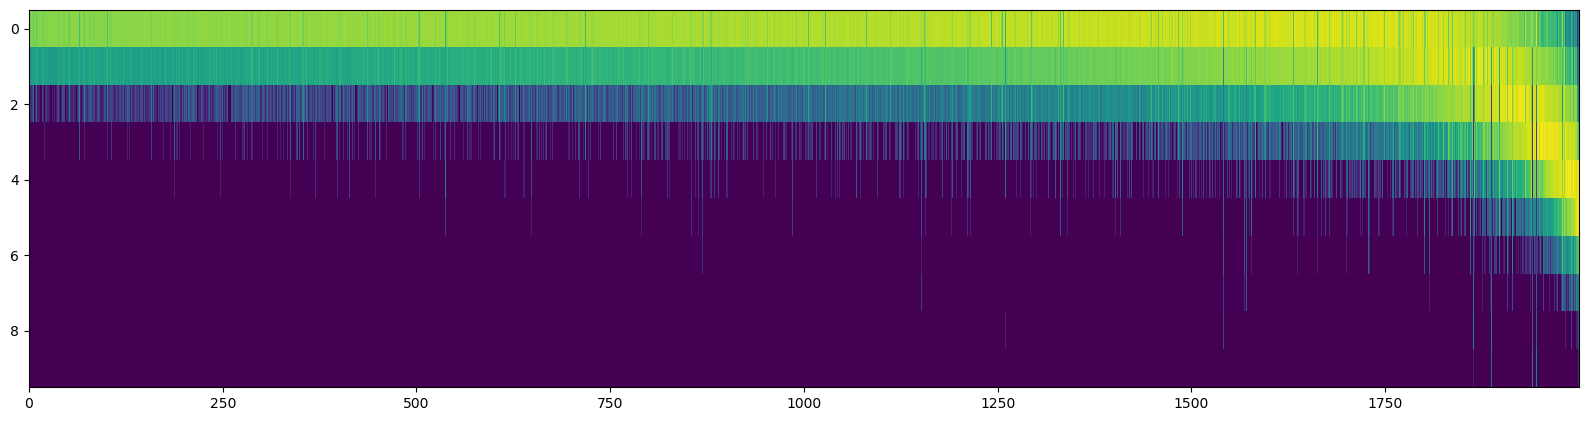

In [104]:
plt.figure(figsize=(20,5))
plt.imshow(np.log2(logarithmic_histogram+1).T[mean_sort].T,aspect="auto")
plt.show()

In [83]:
low_histogram = np.zeros((10,2000))
high_histogram = np.zeros((10,2000))

for i,segment in enumerate(np.arange(0,10)):
    lower = 2**segment
    upper = 2**(segment + 1)
    for j,feature in enumerate(raw_umis[large_cells].T):
        high_histogram[i,j] = np.sum(np.logical_and(feature < upper, feature >= lower))

for i,segment in enumerate(np.arange(0,10)):
    lower = 2**segment
    upper = 2**(segment + 1)
    for j,feature in enumerate(raw_umis[small_cells].T):
        low_histogram[i,j] = np.sum(np.logical_and(feature < upper, feature >= lower))


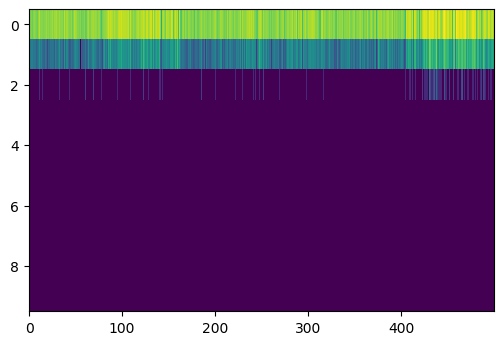

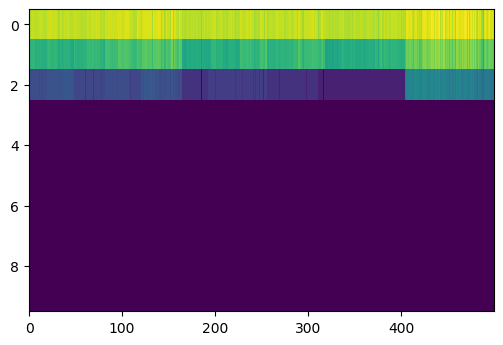

In [85]:
plt.figure()
plt.imshow(np.log2(low_histogram+1).T[feature_agglomeraton][750:1250].T,aspect="auto")
plt.show()

plt.figure()
plt.imshow(np.log2(high_histogram+1).T[feature_agglomeraton][750:1250].T,aspect="auto")
plt.show()


In [ ]:
from random import sample

sample_size = sample(list(per_cell_totals),k=1000)
tpm_samples = sample(list(per_feature_bulk_expression),k=1000)
rhos = []

for tpm in tpm_samples:
    results = []
    for ss in sample_size:
        expected = (tpm/1000000)*ss
        observed = np.random.poisson(expected)
        results.append([observed,ss])
    results = np.array(results)
    rhos.append(spearmanr(results.T[0],results.T[1])[0])



In [ ]:
simulated_mean_sort = np.argsort(tpm_samples)


plt.figure()
plt.title("Spearman Correlation of Features to Total Cell UMIs")
plt.scatter(np.arange(2000),spearman_array.T[1][mean_sort],s=1,c="red",label="Observed")
plt.scatter(np.arange(0,2000,2),np.array(rhos)[simulated_mean_sort],s=1,c='blue',label="Simulated")
plt.ylabel("Correlation (Spearman's Rho)")
plt.xlabel("Features (Ranked by Mean UMI per cell)")
plt.show()

plt.figure()
plt.title("Spearman Correlation of Features to Total Cell UMIs")
plt.scatter(np.log10(np.array(tpm_samples)/666),rhos,s=1,c='blue',label="Simulated")
plt.scatter(np.log10(spearman_array.T[0]),spearman_array.T[1],s=1,c='red',label="Observed")
plt.ylabel("Correlation (Spearman's Rho)")
plt.xlabel("Mean Feature Expression (Log10 UMI)")
plt.legend()
plt.show()


In [ ]:
# feature_sort = dendrogram(linkage(raw_umis.T,metric='correlation',method='average'),no_plot=True)['leaves']
# cell_sort = dendrogram(linkage(raw_umis,metric='cos',method='average'),no_plot=True)['leaves']
plt.figure()
plt.imshow(np.log10(raw_umis+1)[cell_sort].T[feature_sort].T,aspect='auto')
plt.colorbar()
plt.show()

In [1]:
## Ok, so now we'd like to try GLM-PCA via poisson/negb

from glmpca import glmpca

In [ ]:
# Negative binomial is actually the one that converges due to over-dispersion

glm_model = glmpca.glmpca(raw_umis,30,fam="nb",verbose=True,ctl = {"maxIter":20, "eps":1e-4},penalty=1)


Iteration: 0 | deviance=1.9404E+7 | nb_theta: 1.000E+02
Iteration: 1 | deviance=1.8564E+7 | nb_theta: 5.249E+01
Iteration: 2 | deviance=1.3302E+7 | nb_theta: 4.385E+01
Iteration: 3 | deviance=1.2360E+7 | nb_theta: 4.267E+01
Iteration: 4 | deviance=1.2133E+7 | nb_theta: 4.290E+01
Iteration: 5 | deviance=1.2023E+7 | nb_theta: 4.384E+01
Iteration: 6 | deviance=1.1961E+7 | nb_theta: 4.517E+01
Iteration: 7 | deviance=1.1925E+7 | nb_theta: 4.675E+01
Iteration: 8 | deviance=1.1901E+7 | nb_theta: 4.851E+01
Iteration: 10 | deviance=1.1876E+7 | nb_theta: 5.238E+01
Iteration: 11 | deviance=1.1869E+7 | nb_theta: 5.443E+01
Iteration: 12 | deviance=1.1864E+7 | nb_theta: 5.655E+01


In [441]:
import dill,pickle

with open("glm_model.pickle",mode='wb') as f:
    dill.dump(glm_model,f)

In [447]:
glm_model['loadings'].shape

(8005, 30)

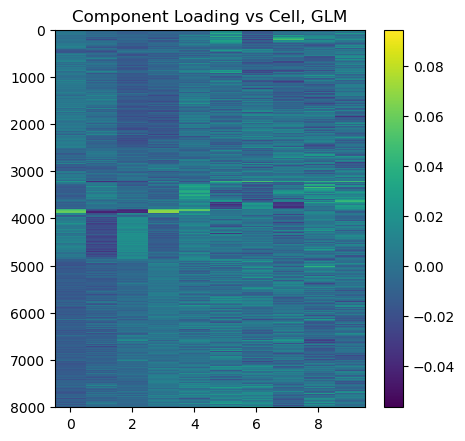

In [554]:
# glm_sort = dendrogram(linkage(glm_model['loadings'],metric='cosine',method='average'),no_plot=True)['leaves']
# glm_factor_sort = dendrogram(linkage(glm_model['loadings'].T,metric='cosine',method='average'),no_plot=True)['leaves']

# plt.figure(figsize=(10,10))
# plt.imshow(glm_model['loadings'][glm_sort].T[glm_factor_sort].T,aspect='auto')
# plt.show()

plt.figure(figsize=(5,5))
plt.title("Component Loading vs Cell, GLM")
plt.imshow(glm_model['loadings'][:,:10][glm_sort],aspect='auto')
plt.colorbar()
plt.show()

In [553]:
len(glm_sort)

8005

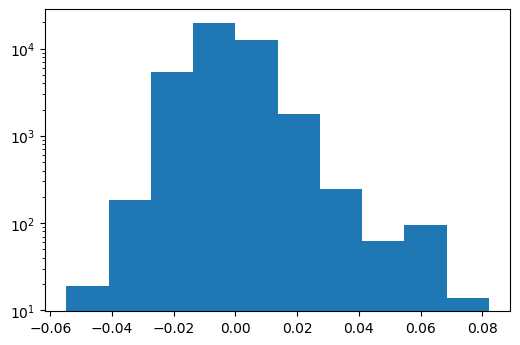

In [542]:
plt.figure()
plt.hist(glm_loadings[:,:5].flatten(),log=True)
plt.show()

In [543]:
glm_loadings.shape

(8005, 30)

In [531]:
# We have to extract the eigenvalues of the glmpca back out with pliers, unfortunately

# glm_factors = glm_model['factors']
# glm_loadings = glm_model['loadings']


# plt.figure(figsize=(10,10))
# plt.imshow(np.outer(glm_factors[:,0],glm_loadings[:,0]).T[cell_sort],aspect='auto')
# plt.show()

glm_v_explained = []
for i in range(10):
    glm_v_explained.append(np.sum(np.power(np.outer(glm_factors[:,i],glm_loadings[:,i]),2)))

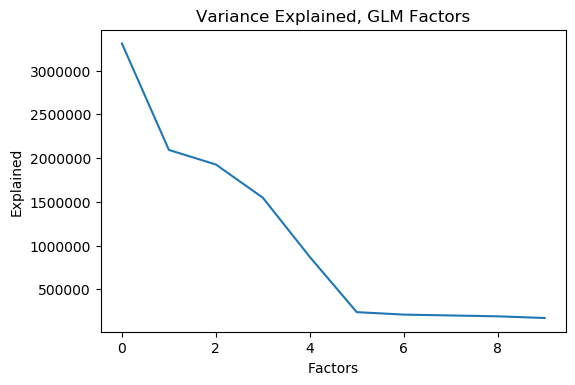

In [546]:
plt.figure()
plt.title("Variance Explained, GLM Factors")
plt.plot(glm_v_explained)
plt.xlabel("Factors")
plt.ylabel("Explained")
plt.show()

In [525]:
from sklearn.manifold import TSNE

glm_tsne = TSNE().fit_transform(glm_loadings)


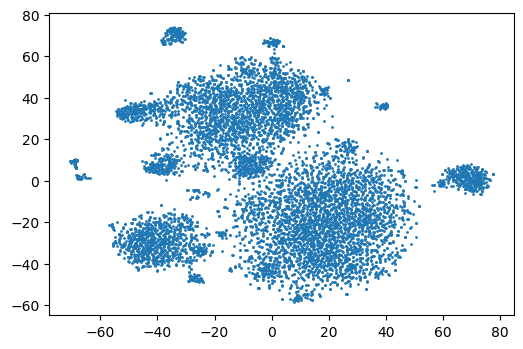

In [527]:
plt.figure()
plt.scatter(*glm_tsne.T,s=1)
plt.show()

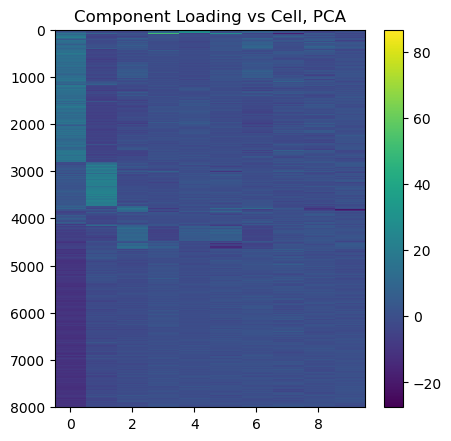

In [555]:
from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale

# scaled_umis = scale(cell_scaled_umis)

# pca_model = PCA(n_components=30).fit(scaled_umis)
pca_transformed = pca_model.transform(scaled_umis)


plt.figure(figsize=(5,5))
plt.title("Component Loading vs Cell, PCA")
plt.imshow(pca_transformed[:,:10][cell_sort],aspect='auto')
plt.colorbar()
plt.show()

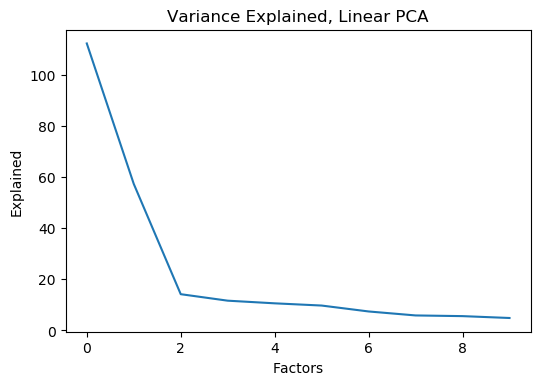

In [545]:
plt.figure()
plt.title("Variance Explained, Linear PCA")
plt.plot(pca_model.explained_variance_[:10])
plt.xlabel("Factors")
plt.ylabel("Explained")
plt.show()

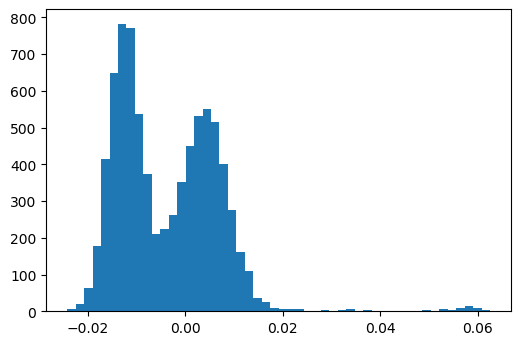

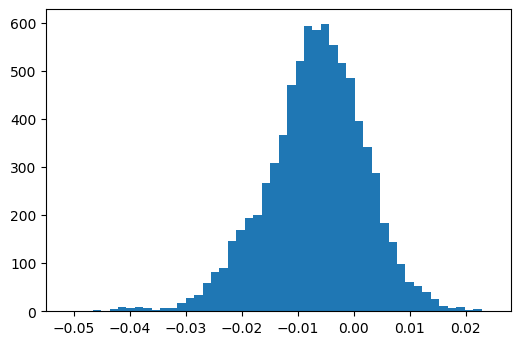

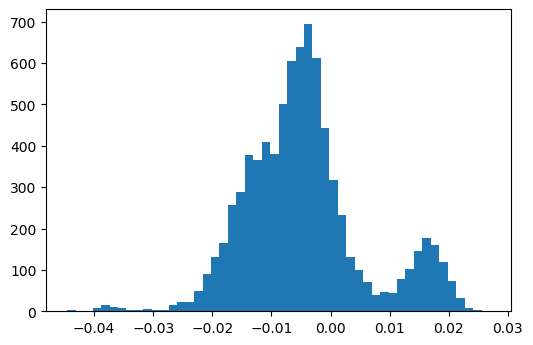

In [559]:
# plt.figure()
# plt.hist(pca_transformed[:,0],bins=50)
# plt.show()

plt.figure()
plt.hist(glm_loadings[:,0],bins=50)
plt.show()

plt.figure()
plt.hist(glm_loadings[:,1],bins=50)
plt.show()

plt.figure()
plt.hist(glm_loadings[:,2],bins=50)
plt.show()

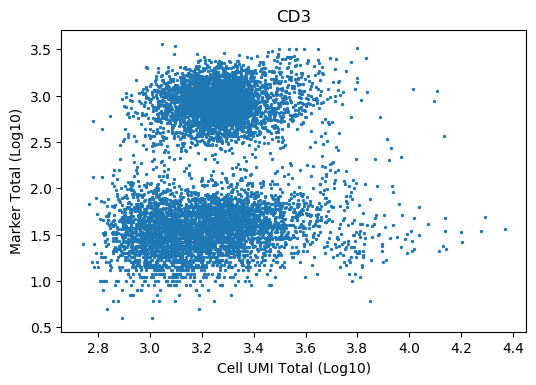

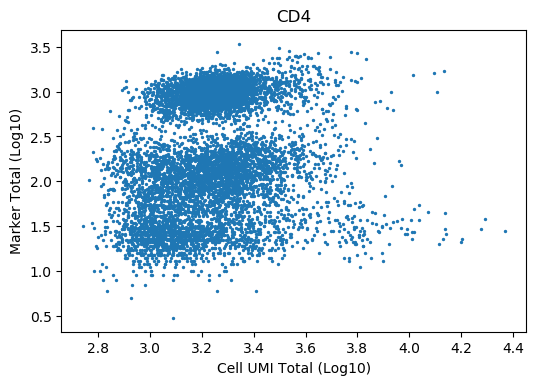

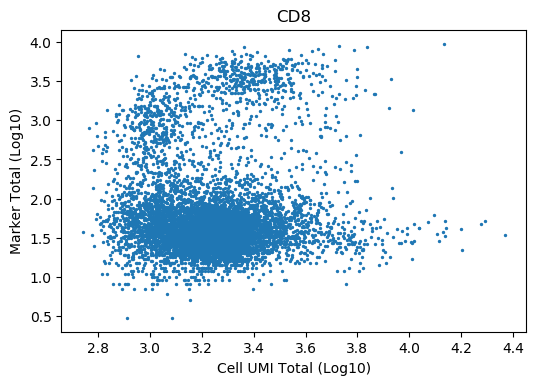

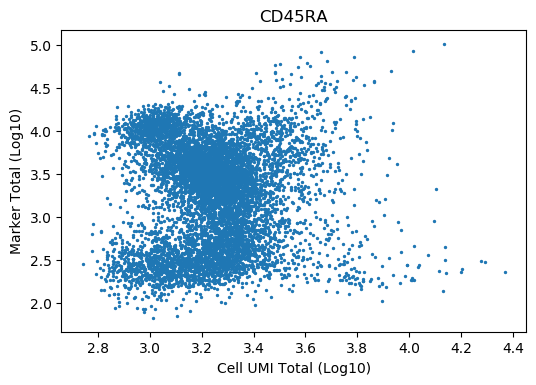

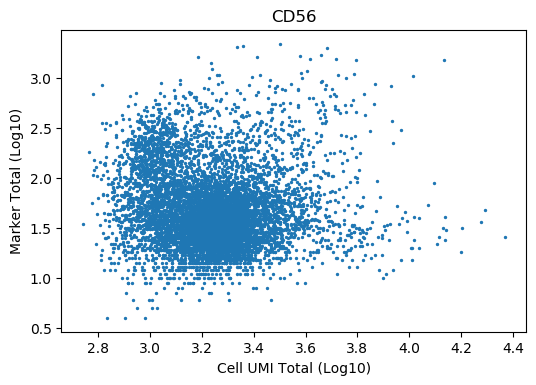

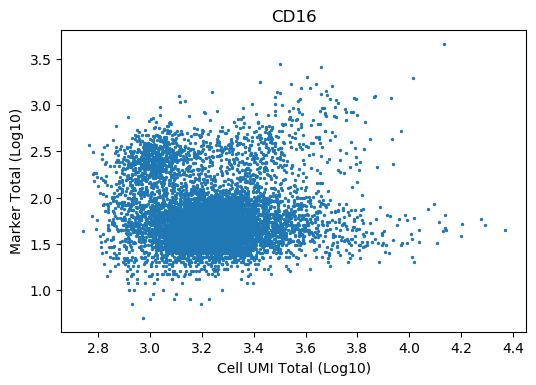

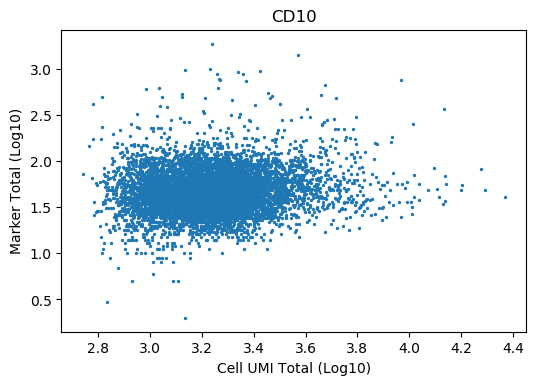

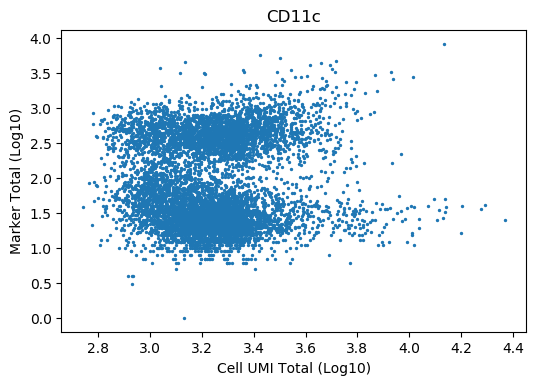

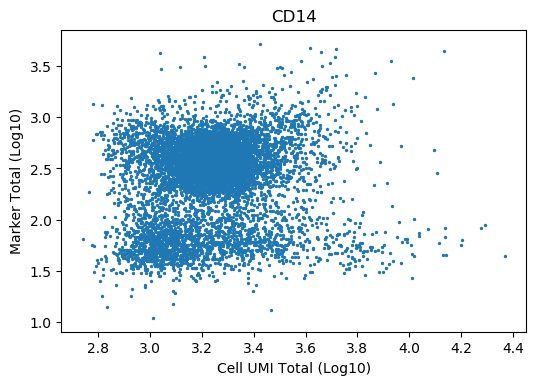

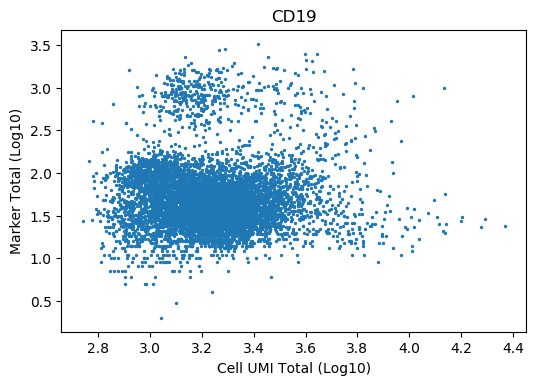

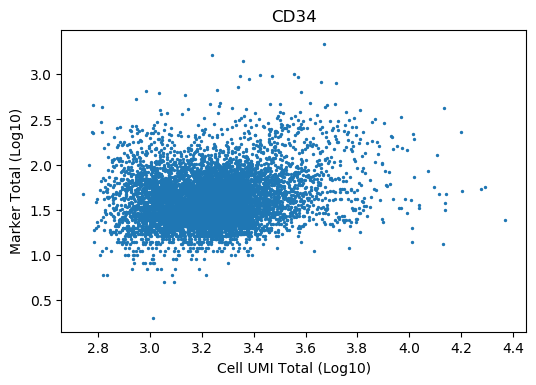

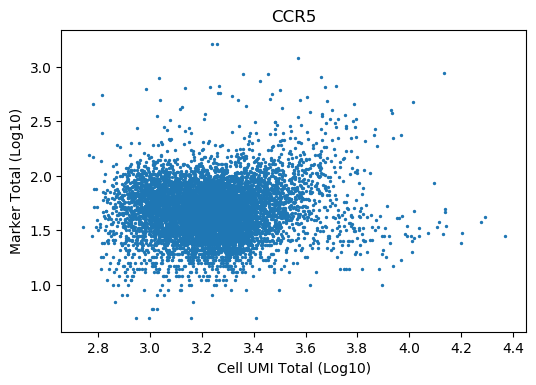

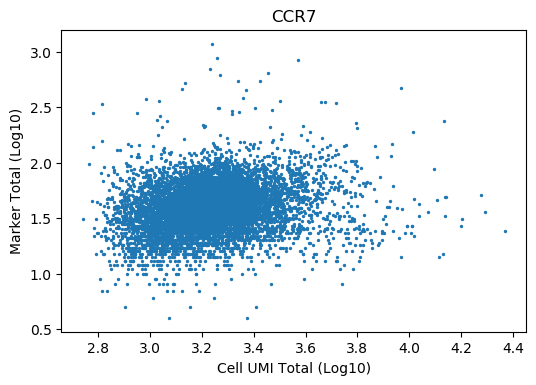

In [78]:
for i in range(len(fluorescence_header)):
    plt.figure()
    plt.title(fluorescence_header[i])
    plt.scatter(np.log10(per_cell_totals),np.log10(raw_fluorescence[i]),s=2)
    plt.xlabel("Cell UMI Total (Log10)")
    plt.ylabel("Marker Total (Log10)")
    plt.show()

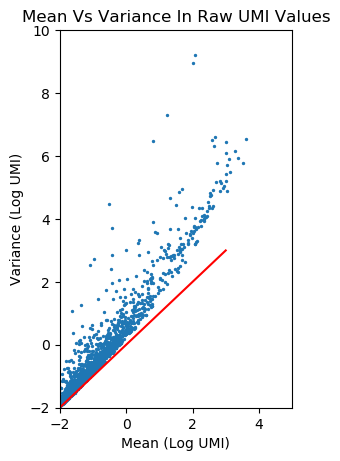

In [247]:
# means = np.mean(raw_umis,axis=0)
# variances = np.var(raw_umis,axis=0)

plt.figure(figsize=(3,5))
plt.title("Mean Vs Variance In Raw UMI Values")
plt.xlabel("Mean (Log UMI)")
plt.ylabel("Variance (Log UMI)")
plt.scatter(np.log(means),np.log(variances),s=2)
plt.plot([-2,3],[-2,3],c="red")
plt.xlim(-2,5)
plt.ylim(-2,10)
plt.show()

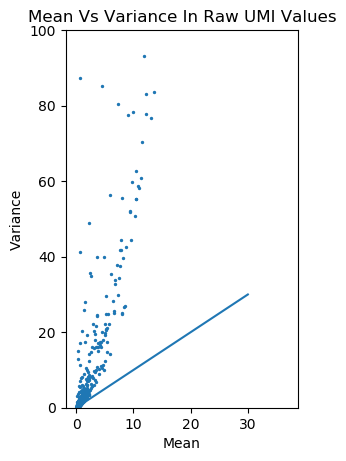

In [255]:
plt.figure(figsize=(3,5))
plt.title("Mean Vs Variance In Raw UMI Values")
plt.xlabel("Mean")
plt.ylabel("Variance")
plt.scatter(means,variances,s=2)
plt.plot([0,30],[0,30])
plt.ylim(0,100)
plt.show()

In [274]:
from random import sample

sample_size = np.array(sample(list(per_cell_totals),k=1000))
tpm = 500

expectation = (tpm / 1000000) * sample_size

draws = np.array([np.random.poisson(e,1)[0] for e in expectation])

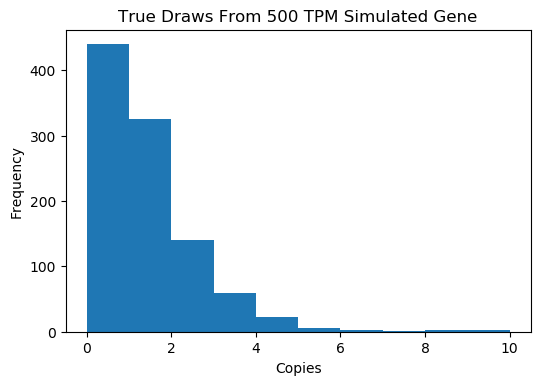

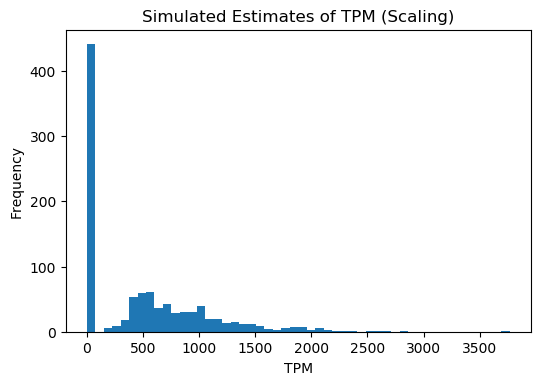

In [283]:
scaled_draws = (draws/sample_size) * 1000000

plt.figure()
plt.title("Simulated Estimates of TPM (Scaling)")
plt.hist(scaled_draws,bins=50)
plt.xlabel("TPM")
plt.ylabel("Frequency")
plt.show()

In [281]:
np.mean(scaled_draws)

483.3489121055956

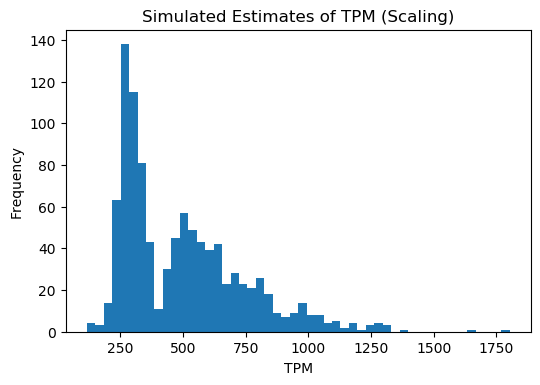

In [285]:
scaled_p1 = ((draws+1)/(sample_size+2000)) * 1000000


plt.figure()
plt.title("Simulated Estimates of TPM (Scaling)")
plt.hist(scaled_p1,bins=50)
plt.xlabel("TPM")
plt.ylabel("Frequency")
plt.show()

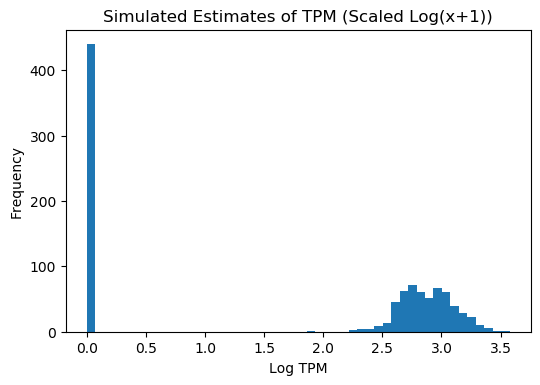

In [288]:
log_scaled = np.log10(scaled_draws + 1)

plt.figure()
plt.title("Simulated Estimates of TPM (Scaled Log(x+1))")
plt.hist(log_scaled,bins=50)
plt.xlabel("Log TPM")
plt.ylabel("Frequency")
plt.show()

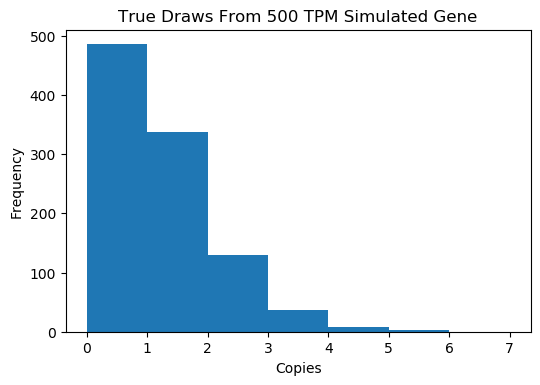

In [292]:
constant_draws = np.random.poisson(((500/1000000)*1500),1000)


plt.figure()
plt.title("True Draws From 500 TPM Simulated Gene")
plt.hist(constant_draws,bins=np.arange(8))
plt.xlabel("Copies")
plt.ylabel("Frequency")
plt.show()